In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Advertising.csv')
X = df.drop('sales',axis=1)
y = df['sales']

### Polynomial Conversion

In [3]:
from sklearn.preprocessing import PolynomialFeatures
p_conv = PolynomialFeatures(degree=3,include_bias=False)
p_features = p_conv.fit_transform(X)
p_features.shape

(200, 19)

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(p_features,y,test_size=1/3, random_state=100)

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
sclr = StandardScaler()

In [7]:
sclr.fit(X_train)

StandardScaler()

In [8]:
sc_X_train = sclr.transform(X_train)
sc_X_test = sclr.transform(X_test)

In [9]:
sc_X_test

array([[-1.47615197,  1.06197875,  0.82373144, ...,  1.04555019,
         0.68051057,  0.19961934],
       [ 0.97222558,  0.75453608, -1.17148427, ..., -0.57012739,
        -0.59255854, -0.49224554],
       [-0.1223182 ,  1.24911777,  0.6167223 , ...,  1.12013107,
         0.5289312 ,  0.02397826],
       ...,
       [-0.13188218, -1.21042361, -0.99530628, ..., -0.70823635,
        -0.59952423, -0.48874102],
       [-0.70678333, -1.53791689, -0.99971073, ..., -0.71336579,
        -0.6049942 , -0.48887826],
       [ 0.9892282 , -1.2638919 ,  0.22032183, ..., -0.69911663,
        -0.53293994, -0.22441542]])

In [10]:
sc_X_train

array([[-0.62070756,  0.16638488,  1.82794597, ...,  0.3830412 ,
         1.16819615,  1.62121304],
       [-1.35288297, -0.46855108, -0.42272782, ..., -0.58222428,
        -0.50229838, -0.43375121],
       [ 0.84045526, -0.98986691,  1.08359397, ..., -0.62609448,
        -0.26713651,  0.47126353],
       ...,
       [-0.07874899, -0.56880412, -0.95566623, ..., -0.66410158,
        -0.58552306, -0.48736777],
       [-0.89700017, -0.69579131, -0.59890581, ..., -0.64662559,
        -0.55053192, -0.46027559],
       [-1.46765066, -1.39756263, -1.36087561, ..., -0.71326449,
        -0.60496709, -0.49303617]])

/var/folders/y_/yyrc0_qx4hj07x4815132xpw0000gn/T/ipykernel_1371/4133032638.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sc_X_train)


<Axes: ylabel='Density'>

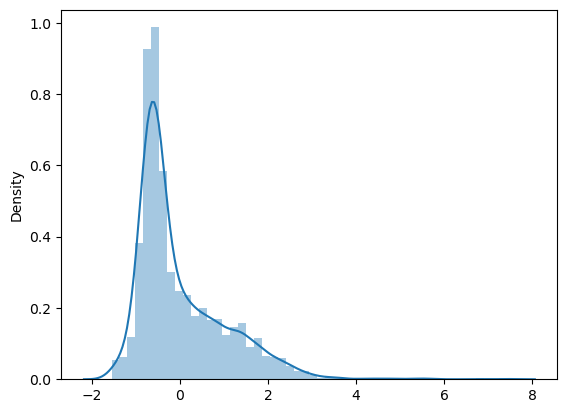

In [11]:
sns.distplot(sc_X_train)

In [18]:
#from sklearn.preprocessing import MinMaxScaler

In [19]:
#MM_sc = MinMaxScaler()

In [20]:
#MM_sc.fit(X_train)

In [21]:
#MM_sc_X_train = MM_sc.transform(X_train)
#MM_sc_X_test = MM_sc.transform(X_test)

In [16]:
#MM_sc_X_test

array([[ 2.40108218e-02,  7.82961460e-01,  4.42392260e-01, ...,
         4.26937154e-01,  2.09388893e-01,  8.74453890e-02],
       [ 8.03178898e-01,  6.89655172e-01,  4.39753738e-02, ...,
         3.47571959e-02,  2.02182983e-03,  1.00469512e-04],
       [ 4.54852891e-01,  8.39756592e-01,  4.01055409e-01, ...,
         4.45040473e-01,  1.84698506e-01,  6.52714693e-02],
       ...,
       [ 4.51809266e-01,  9.33062880e-02,  7.91556728e-02, ...,
         1.23344848e-03,  8.87205725e-04,  5.42899850e-04],
       [ 2.68853568e-01, -6.08519270e-03,  7.82761653e-02, ...,
        -1.16427767e-05, -3.78428085e-06,  5.25574005e-04],
       [ 8.08589787e-01,  7.70791075e-02,  3.21899736e-01, ...,
         3.44711505e-03,  1.17329547e-02,  3.39128523e-02]])

## Ridge Regression

In [22]:
from sklearn.linear_model import Ridge

In [23]:
r_model = Ridge(alpha=10)

In [24]:
r_model.fit(sc_X_train,y_train)

Ridge(alpha=10)

In [25]:
r_test_pred = r_model.predict(sc_X_test)
r_test_pred

array([ 8.46724322, 20.31366434, 16.83098158, 19.66471403, 21.88772085,
       12.22633615, 11.98208027, 11.65983304, 21.79935348, 22.29604997,
       11.08201744, 19.93339902,  8.38517253, 14.8040842 ,  9.9081556 ,
        9.25631856, 15.91054208, 11.89290514, 16.95064516, 11.61422212,
       16.45285267, 10.47279399, 22.359318  , 17.39845433, 14.8093853 ,
       23.61745729, 19.65206281, 10.43316369, 19.7679934 , 14.37391533,
       12.69152412,  8.86726229, 10.69165485, 14.3580045 ,  8.58544157,
       13.30232271,  9.12415471, 11.60099796, 12.18330679, 14.80189433,
       16.82525513, 13.16612243, 14.23453438, 12.53031458, 11.93577344,
        9.84982766,  9.28692305, 18.86657927,  9.86342053,  7.64257199,
       15.85672973, 18.53248045, 12.22852355, 16.5295305 , 17.71554554,
       10.74744067,  7.13899939,  9.2697629 , 15.72352044, 12.91010258,
       16.65482944, 17.93537581, 21.74939539, 14.49461871, 10.3516662 ,
        8.44073085, 12.63232383])

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [27]:
MAE = mean_absolute_error(y_test,r_test_pred)
MAE

0.5644480142885442

In [28]:
MSE = mean_squared_error(y_test,r_test_pred)
MSE

0.4695787586702105

In [29]:
RMSE = np.sqrt(MSE)
RMSE

0.6852581693567837

## Ridge RegressionCV

In [30]:
from sklearn.linear_model import RidgeCV

In [31]:
r_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0))

In [32]:
r_cv_model.fit(sc_X_train,y_train)

RidgeCV()

In [33]:
r_cv_model.alpha_

0.1

In [34]:
r_cv_test_pred = r_cv_model.predict(sc_X_test)
r_cv_test_pred

array([ 7.06327484, 21.13937509, 17.94005794, 19.88495943, 22.2191407 ,
       12.04696951, 12.75244248, 11.47318185, 22.14419661, 22.80247922,
       12.09836793, 19.94300917,  8.38392227, 15.79641105, 10.46832815,
        9.63688815, 17.66236009, 12.08473684, 18.6241902 , 12.40045246,
       17.38772479, 10.80969479, 22.66765434, 18.31149089, 15.62470008,
       24.56430508, 19.99793701, 11.06244502, 21.41959842, 15.94662608,
       13.23895165,  9.17689295, 11.04101838, 14.97901115,  8.58029081,
       14.7283067 ,  9.30236687, 11.91105614, 11.75415264, 14.99421371,
       17.0516909 , 14.07507863, 14.88035615, 12.27191524, 13.11088699,
       10.30833058,  8.81407791, 19.16307698, 10.29170147,  7.1786449 ,
       16.42295784, 19.52276123, 12.95132831, 17.85319448, 18.75485917,
       10.75175342,  6.2504513 ,  8.21253633, 16.62681113, 13.79059142,
       17.45001958, 18.81671818, 22.58811814, 15.99773521, 10.74787975,
        8.48139016, 12.25397817])

In [35]:
MAE = mean_absolute_error(y_test,r_cv_test_pred)
MAE

0.3412992364859927

In [36]:
MSE = mean_squared_error(y_test,r_cv_test_pred)
MSE

0.18173505963088246

In [37]:
RMSE = np.sqrt(MSE)
RMSE

0.42630395216427736

In [38]:
r_cv_model.coef_

array([ 6.43931383,  0.47637602,  0.54198712, -7.6032521 ,  5.13449813,
       -1.22762129, -0.02860374, -0.24013695, -0.20408562,  3.18130708,
       -1.58505886,  0.92765172,  0.59297492, -0.47114429,  0.28689568,
       -0.41457346,  0.28670266,  0.34351558, -0.22864379])